In [50]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
rng = np.random.default_rng()
sn.set_style('whitegrid')

In [74]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'cleaned_words.csv', skipinitialspace=True, )
all_words_and_measures = all_words_and_measures.round(decimals=2)

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])
all_words_and_measures

# all_words_and_measures.to_excel('cleaned_words.xlsx')

,Stimuli,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Humans Binary,Difference Score
0,the dog puppy.,Makes Sense,Makes Sense,Makes Sense,4,4,4,-1,1.86,1.19,...,11906,4.08,1285,87,1372,3.11,1.94,5.05,Ambiguous,2.14
1,the baby teeth.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.82,0.48,...,36451,4.56,3281,1396,4677,3.52,3.14,6.66,Makes Sense,1.82
2,the dress summer.,Makes Sense,Makes Sense,Makes Sense,2,2,2,-1,1.00,1.24,...,592,2.77,1516,2165,3681,3.18,3.34,6.52,Nonsense,1.00
3,the boot car.,Nonsense,Nonsense,Nonsense,2,1,2,-1,0.71,0.98,...,1101,3.04,159,4944,5103,2.20,3.69,5.90,Nonsense,1.29
4,the pig truck.,Nonsense,Nonsense,Nonsense,2,2,2,1,1.93,1.56,...,324,2.51,320,444,764,2.51,2.65,5.15,Ambiguous,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,Makes Sense,Makes Sense,Makes Sense,3,2,3,1,3.83,0.76,...,144824,5.16,209,497,706,2.32,2.70,5.02,Makes Sense,0.83
2156,the sand beach.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.68,1.25,...,171603,5.23,952,1060,2012,2.98,3.03,6.00,Makes Sense,0.68
2157,the mouth pig.,Makes Sense,Makes Sense,Makes Sense,1,1,2,-1,0.29,0.60,...,812,2.91,2411,320,2731,3.38,2.51,5.89,Nonsense,0.71
2158,the field flower.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.70,1.46,...,2779,3.44,2327,496,2823,3.37,2.70,6.06,Makes Sense,0.70


In [60]:
all_words_and_measures.describe().round(decimals=2)

,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,N,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum
count,2160.00,2160.00,2160.00,2160.0,2160.00,2160.00,2160.00,2045.00,2144.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00
mean,2.77,2.71,2.59,0.0,2.03,1.05,28.38,0.02,0.02,0.19,9.87,21133.64,3.14,1724.97,1724.97,3449.94,2.88,2.88,5.76
std,0.75,0.67,0.55,1.0,1.22,0.40,1.59,0.06,0.06,0.16,2.23,99406.72,1.27,2209.81,2209.81,3127.70,0.61,0.61,0.88
min,0.00,0.00,0.00,-1.0,0.04,0.00,26.00,0.00,0.00,-0.03,6.00,0.00,0.00,7.00,7.00,83.00,0.85,0.85,3.21
25%,2.00,2.00,2.00,-1.0,0.97,0.85,28.00,0.00,0.00,0.07,8.00,273.75,2.44,280.50,280.50,1146.25,2.45,2.45,5.18
50%,3.00,3.00,3.00,0.0,1.69,1.13,28.00,0.00,0.00,0.15,10.00,1676.00,3.22,829.00,829.00,2252.00,2.92,2.92,5.81
75%,3.00,3.00,3.00,1.0,3.24,1.33,29.00,0.00,0.00,0.27,11.00,10872.00,4.04,1998.00,1998.00,5050.50,3.30,3.30,6.39
max,4.00,4.00,4.00,1.0,4.00,1.85,58.00,1.00,0.73,0.87,20.00,3414040.00,6.53,8831.00,8831.00,15827.00,3.95,3.95,7.79


<AxesSubplot:ylabel='Count'>

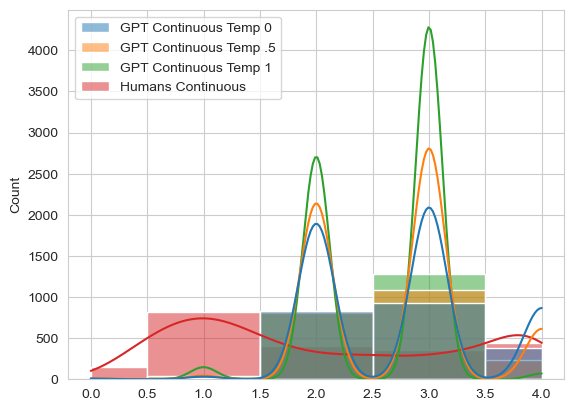

In [61]:
sn.histplot(data=all_words_and_measures[['GPT Continuous Temp 0', 'GPT Continuous Temp .5', 'GPT Continuous Temp 1', 'Humans Continuous']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

In [77]:
remove_middle = all_words_and_measures[all_words_and_measures['Humans Binary'].isin(['Makes Sense', 'Nonsense'])]
remove_middle.describe()

,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,N,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
count,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1670.000000,1754.000000,1768.000000,1768.000000,1.768000e+03,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,2.764706,2.696833,2.582014,0.003394,2.047178,0.969915,28.347285,0.015533,0.016499,0.190452,9.855769,2.346315e+04,3.126510,1698.859729,1674.358597,3373.218326,2.876318,2.872336,5.748360,1.308863
std,0.748557,0.677683,0.558977,1.000277,1.337629,0.383615,1.292258,0.060139,0.062300,0.159437,2.218181,1.088218e+05,1.321857,2179.131824,2153.927243,3049.904465,0.609682,0.606509,0.871382,0.812327
min,0.000000,0.000000,0.000000,-1.000000,0.040000,0.000000,26.000000,0.000000,0.000000,-0.030000,6.000000,0.000000e+00,0.000000,7.000000,7.000000,83.000000,0.850000,0.850000,3.210000,0.000000
25%,2.000000,2.000000,2.000000,-1.000000,0.860000,0.780000,28.000000,0.000000,0.000000,0.070000,8.000000,2.427500e+02,2.390000,281.000000,279.000000,1138.000000,2.450000,2.450000,5.160000,0.710000
50%,3.000000,3.000000,3.000000,1.000000,1.360000,1.040000,28.000000,0.000000,0.000000,0.150000,10.000000,1.695500e+03,3.230000,802.500000,829.000000,2208.000000,2.905000,2.920000,5.780000,1.140000
75%,3.000000,3.000000,3.000000,1.000000,3.480000,1.250000,29.000000,0.000000,0.000000,0.262500,11.000000,1.206550e+04,4.080000,1938.000000,1933.000000,4992.000000,3.290000,3.290000,6.380000,1.820000
max,4.000000,4.000000,4.000000,1.000000,4.000000,1.700000,58.000000,1.000000,0.730000,0.870000,20.000000,3.414040e+06,6.530000,8831.000000,8831.000000,15815.000000,3.950000,3.950000,7.790000,3.900000


<AxesSubplot:ylabel='Count'>

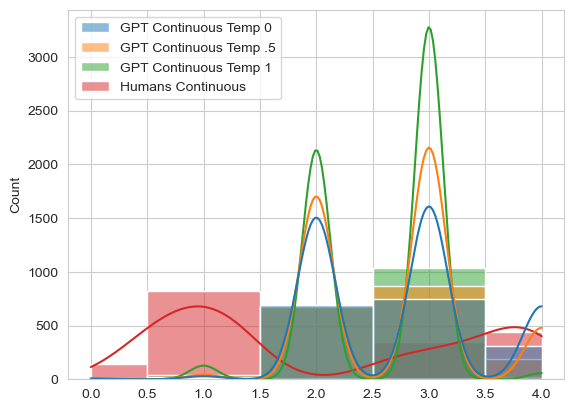

In [65]:
sn.histplot(data=remove_middle[['GPT Continuous Temp 0', 'GPT Continuous Temp .5', 'GPT Continuous Temp 1', 'Humans Continuous']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

In [66]:
print(all_words_and_measures['GPT Temp 0'].value_counts())
print(all_words_and_measures['GPT Temp .5'].value_counts())
print(all_words_and_measures['GPT Temp 1'].value_counts())
print(all_words_and_measures['Humans Binary'].value_counts())

Makes Sense    1840
Nonsense        320
Name: GPT Temp 0, dtype: int64
Makes Sense    1848
Nonsense        312
Name: GPT Temp .5, dtype: int64
Makes Sense    1798
Nonsense        362
Name: GPT Temp 1, dtype: int64
Nonsense       977
Makes Sense    791
Ambiguous      392
Name: Humans Binary, dtype: int64


<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

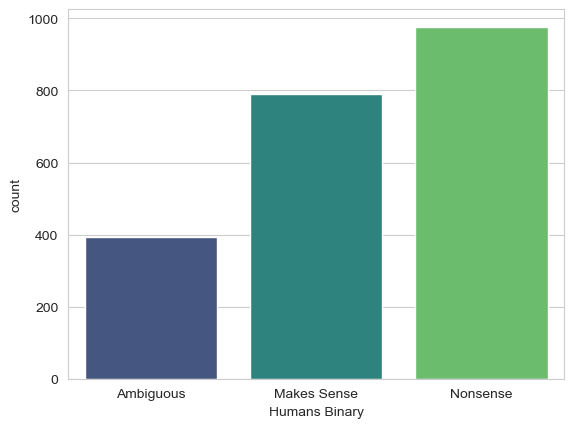

In [67]:
sn.countplot(data=all_words_and_measures, x="Humans Binary", palette="viridis")

<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

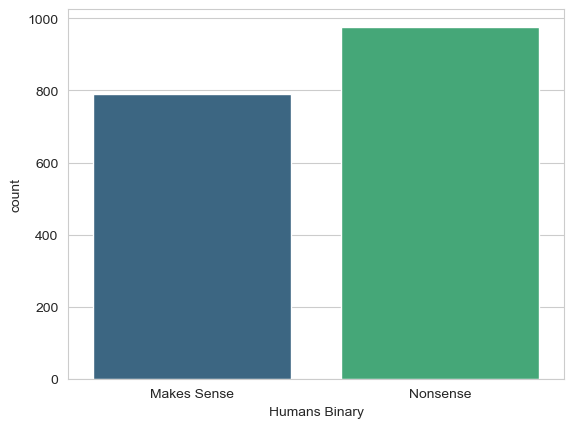

In [68]:
sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis')

<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

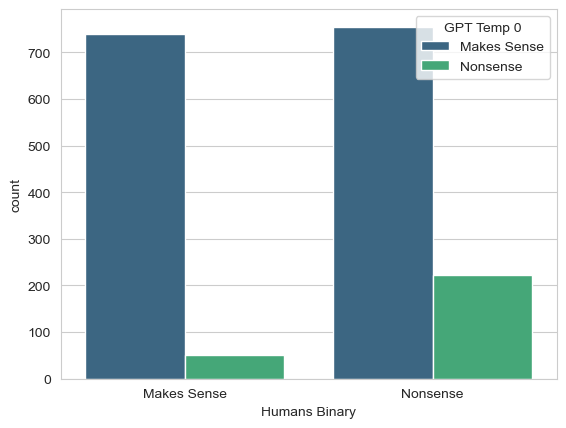

In [71]:
#Out of ~1000 nonsense labels by humans, over 700 are labeled as 'Makes Sense' by GPT 3.5

sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis', hue="GPT Temp 0")

In [107]:
pd.crosstab(remove_middle['GPT Temp 0'], remove_middle['Humans Binary'])

Humans Binary,Makes Sense,Nonsense
GPT Temp 0,,
Makes Sense,740,755
Nonsense,51,222


In [109]:
print(remove_middle['GPT Temp 0'].value_counts())
print(remove_middle['Humans Binary'].value_counts())

Makes Sense    1495
Nonsense        273
Name: GPT Temp 0, dtype: int64
Nonsense       977
Makes Sense    791
Name: Humans Binary, dtype: int64


In [110]:
stats.chisquare(f_obs=[1495, 273], f_exp=[977,791])

Power_divergenceResult(statistic=613.8619758878996, pvalue=1.6172072706541156e-135)

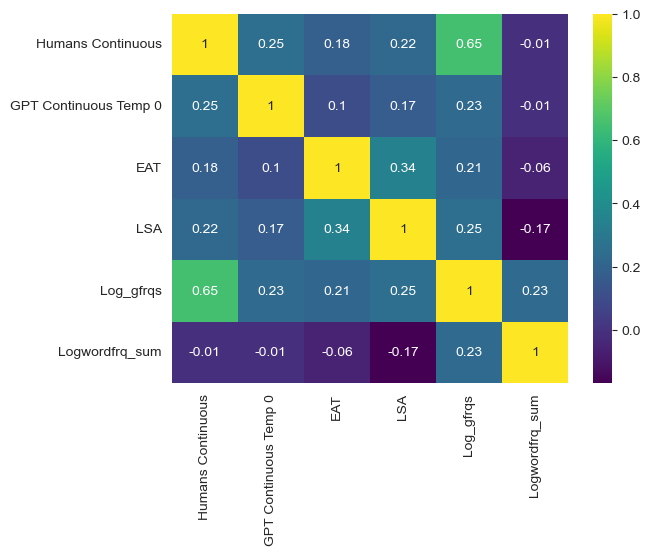

In [73]:
abbrev_measures = remove_middle[['Humans Continuous', 'GPT Continuous Temp 0', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

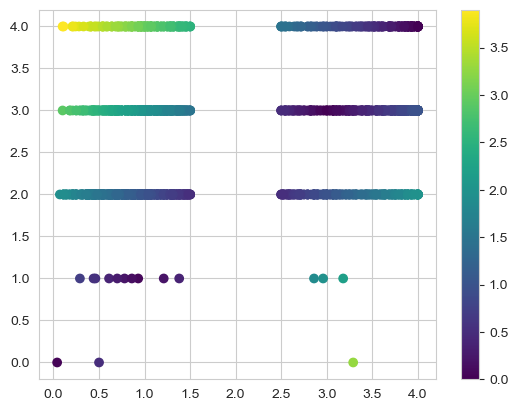

In [81]:
#scatter of Graves 2013 with GPT. Colors and Sizes reflect the difference scores between the two

sn.set_style('whitegrid')
cmap = sn.color_palette("viridis", as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(remove_middle['Humans Continuous'], remove_middle['GPT Continuous Temp 0'], c=remove_middle['Difference Score'], cmap=cmap)
f.colorbar(points)

In [82]:
# #old plot with regression line
# sn.lmplot(data=remove_middle, x='Humans Continuous', y='GPT Continuous Temp 0')

In [111]:
remove_middle['GPT Correct?'] = np.where(
    remove_middle['GPT Temp 0'] == remove_middle['Humans Binary'], 'Yes', 'No')

meaningful = remove_middle[remove_middle['Humans Binary'] == 'Makes Sense']
nonsense = remove_middle[remove_middle['Humans Binary'] == 'Nonsense']

meaningful

C:\Users\Nick\AppData\Local\Temp\ipykernel_18520\2978252377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_middle['GPT Correct?'] = np.where(


,Stimuli,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Humans Binary,Difference Score,GPT Correct?,Answer Type
1,the baby teeth.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.82,0.48,...,3281,1396,4677,3.52,3.14,6.66,Makes Sense,1.82,Yes,True Positive
11,the mother goose.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.93,0.26,...,7356,107,7463,3.87,2.03,5.90,Makes Sense,1.93,Yes,True Positive
15,the tennis star.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,4.00,0.00,...,398,952,1350,2.60,2.98,5.58,Makes Sense,2.00,Yes,True Positive
17,the dime bag.,Nonsense,Nonsense,Nonsense,2,2,1,1,3.07,1.39,...,66,1122,1188,1.82,3.05,4.87,Makes Sense,1.07,No,False Negative
19,the sky rocket.,Makes Sense,Nonsense,Makes Sense,2,2,2,1,2.71,1.33,...,1380,146,1526,3.14,2.16,5.30,Makes Sense,0.71,Yes,True Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,the prison van.,Makes Sense,Makes Sense,Makes Sense,2,2,3,1,3.10,1.26,...,1239,971,2210,3.09,2.99,6.08,Makes Sense,1.10,Yes,True Positive
2149,the bird magazine.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.54,1.07,...,752,703,1455,2.88,2.85,5.72,Makes Sense,1.54,Yes,True Positive
2155,the goat cheese.,Makes Sense,Makes Sense,Makes Sense,3,2,3,1,3.83,0.76,...,209,497,706,2.32,2.70,5.02,Makes Sense,0.83,Yes,True Positive
2156,the sand beach.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.68,1.25,...,952,1060,2012,2.98,3.03,6.00,Makes Sense,0.68,Yes,True Positive


In [112]:
print(meaningful['GPT Temp 0'].value_counts())

Makes Sense    740
Nonsense        51
Name: GPT Temp 0, dtype: int64
Makes Sense    791
Name: Humans Binary, dtype: int64


In [116]:
print(nonsense['GPT Temp 0'].value_counts())

Makes Sense    755
Nonsense       222
Name: GPT Temp 0, dtype: int64


<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

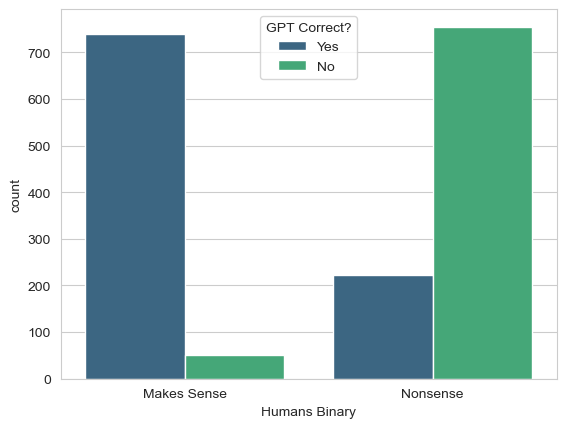

In [95]:
sn.countplot(data=remove_middle, x='Humans Binary', palette='viridis', hue='GPT Correct?')

<AxesSubplot:xlabel='Humans Continuous', ylabel='GPT Continuous Temp 0'>

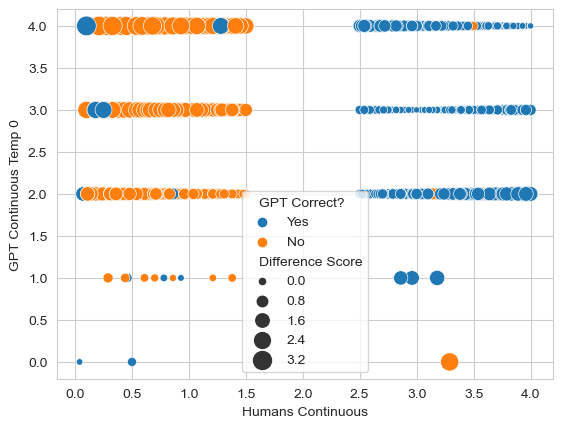

In [103]:
sn.set_style('whitegrid')
cmap = sn.color_palette("viridis", as_cmap=True)

sn.scatterplot(data=remove_middle, x='Humans Continuous', y='GPT Continuous Temp 0', hue='GPT Correct?', size='Difference Score', sizes=(20,200))

In [104]:
#false positives are where GPT said it made sense when humans said it did not make sense
#flase negatives are where GPT said it did not make sense when humans said it did
#true positives are where GPT matched humans in saying that it made sense
#true negatives are where GPT matched humans in saying that it did not make sense

answer_types = [
    (remove_middle['GPT Temp 0'] == 'Makes Sense') & (remove_middle['Humans Binary'] == 'Nonsense'),
    (remove_middle['GPT Temp 0'] == 'Nonsense') & (remove_middle['Humans Binary'] == 'Makes Sense'),
    (remove_middle['GPT Temp 0'] == 'Makes Sense') & (remove_middle['Humans Binary'] == 'Makes Sense'),
    (remove_middle['GPT Temp 0'] == 'Nonsense') & (remove_middle['Humans Binary'] == 'Nonsense')
]

answer_names = ['False Positive', 'False Negative', 'True Positive', 'True Negative']

remove_middle['Answer Type'] = np.select(answer_types, answer_names)

C:\Users\Nick\AppData\Local\Temp\ipykernel_18520\3048791905.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_middle['Answer Type'] = np.select(answer_types, answer_names)


<AxesSubplot:xlabel='Answer Type', ylabel='Count'>

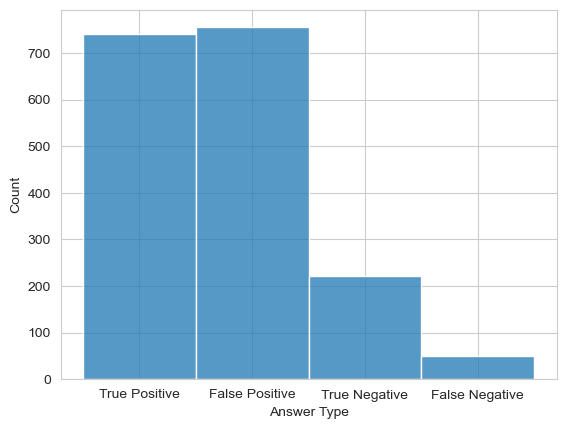

In [105]:
sn.histplot(data=remove_middle['Answer Type'])

<AxesSubplot:xlabel='Humans Continuous', ylabel='GPT Continuous Temp 0'>

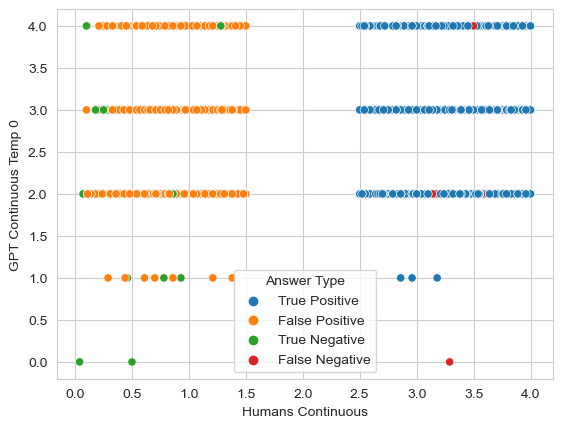

In [106]:
sn.scatterplot(data=remove_middle, x='Humans Continuous', y='GPT Continuous Temp 0', hue='Answer Type')